In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"iris.csv")
# 删除不需要的ID 与 species 列（特征值），因为回归预测，类别信息就没有用处了。
data.drop(["species"],axis = 1 , inplace = True)
# 删除重复记录
data.drop_duplicates(inplace = True)

In [3]:
class KNN:
    """ 使用 python 算法实现 K 近邻算法（回归预测）
    该算法属于回归预测，跟进前三个特征属性，寻找最近的 k 个邻居，再根据 k 个邻居的第四个特征属性，与预测当前样本的第四个属性
    """
    
    def __init__(self , k):
        """初始化方法
        Parameters
        -----
        k : int 
            邻居的个数
        """
        self.k = k 
        
    def fit(self, X, y):
        """训练方法
        Parameters
        -----
        X ; 类数组类型（特征矩阵），形状为（[样本数量],[特征数量]）
            带训练的样本特征（属性）
        y : 类数组类型（目标标签），形状为（[样本数量]）
            带训练的目标值（标签）
        """
        # 将X ,y 转换成 ndarray 数组的形式，方便统一操作
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        """根据参数传递的 X ，对样本数据进行预测
        Parameters
        -----
        X : 类数组类型（特征矩阵），形状为（[样本数量],[特征数量]）
            带测试的样本特征（属性）
        Returns:
        -----
        result : 数组类型
            预测的结果值
        """
        # 转换成数组类型
        X = np.asarray(X)
        # 保存预测的结果值
        result = []
        for x in X:
            # 计算距离，计算与训练集中与每个训练集最近的距离
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis = 1))
            # 返回数组排序后，每个元素在原数组（即排序之前的数组）中的索引
            index = dis.argsort()
            # 取前 k 个距离最新的索引
            index = index[:self.k]
            # 计算均值并加入到 返回的结果中
            result.append(np.mean(self.y[index]))
        return np.asarray(result)
    
    def predictWithWeight(self, X):
        """根据参数传递的 X ，对样本数据进行预测 (考虑权重)
        权重的计算方式： 使用每个节点（邻居） 距离的倒数 / 所有节点距离倒数之和。
        Parameters
        -----
        X : 类数组类型（特征矩阵），形状为（[样本数量],[特征数量]）
            带测试的样本特征（属性）
        Returns:
        -----
        result : 数组类型
            预测的结果值
        """
        # 转换成数组类型
        X = np.asarray(X)
        # 保存预测的结果值
        result = []
        for x in X:
            # 计算距离，计算与训练集中与每个训练集最近的距离
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis = 1))
            # 返回数组排序后，每个元素在原数组（即排序之前的数组）中的索引
            index = dis.argsort()
            # 取前 k 个距离最新的索引
            index = index[:self.k]
            # 计算所有相邻节点的倒数之和 [注意 最后加上 +0.001 为了避免除数(距离)为0 的情况]
            s = np.sum(1 / (dis[index] + 0.001))
            # 使用每个节点的倒数除以倒数之和
            weight = (1 / (dis[index] + 0.001)) / s
            # 使用邻居节点的目标值乘以相应的权重后相加，并加入到 返回的结果中
            result.append(np.sum(self.y[index] * weight))
        return np.asarray(result)
    
            

In [4]:
t = data.sample(len(data),random_state = 0)
train_X = t.iloc[:120,:-1]
train_y = t.iloc[:120,-1]

test_X = t.iloc[120:,:-1]
test_y = t.iloc[120:,-1]

knn = KNN(k = 3)
knn.fit(train_X , train_y)
result = knn.predict(test_X)
# display(result)
# 使用误差的平方和 来进行预测
np.mean((result - test_y) ** 2)
# display(test_y.values)

0.04185185185185184

In [5]:
# 基于权重进行预测
result2 = knn.predictWithWeight(test_X)
np.mean((result - test_y) ** 2)

0.04185185185185184

In [6]:
# 进行可视化展示
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [7]:
# 使用中文
# 默认情况下 matplotlib 不支持中文显示，设置任意支持中文的字体即可
mpl.rcParams['font.sans-serif'] = 'WenQuanYi Micro Hei'

# 设置中文字体中正常显示负号（-）。即不适用 unicode 中的 “-” 展示
mpl.rcParams["axes.unicode_minus"] = False

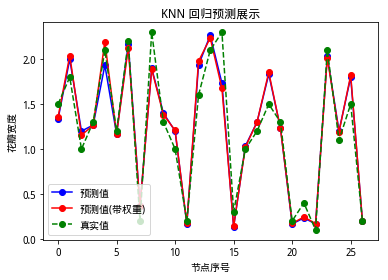

In [8]:
# 设置绘制大小
# plt.figure(figsize = (10,10))
# 绘制预测值 ro- 表示红色，实心，实线
plt.plot(result,"bo-",label = "预测值")
plt.plot(result2,"ro-",label = "预测值(带权重)")
# 绘制真实值 go-- 表示绿色，实心，虚线
plt.plot(test_y.values,"go--",label = "真实值")

plt.title("KNN 回归预测展示")
plt.xlabel("节点序号")
plt.ylabel("花瓣宽度")
# 展示图例
plt.legend()

plt.show()